
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the 'total market' which we define as sp500, sp400, nasdaq100, and dow30.  Construct portfolios from the 'total market' and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp500-galaxy', 'sp400-galaxy', 'nasdaq100-galaxy', 'dow30-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M Company,US Stocks:Industrials,43.26,73.71,31.04,4.19,7.28,16.66,10.17,22.06,4.19,0.19
1,ABT,Abbott Laboratories,US Stocks:Healthcare,-62.16,-23.40,25.70,22.10,24.86,35.90,32.11,20.27,22.10,1.09
2,ABBV,AbbVie Inc.,US Stocks:Healthcare,-30.22,29.06,26.88,9.74,16.66,13.63,9.23,28.70,9.74,0.34
3,ABMD,Abiomed,US Stocks:Healthcare,-36.79,-14.67,22.66,-10.65,23.23,29.27,21.28,45.54,-10.65,-485.00
4,ACN,Accenture,US Stocks:Technology,-23.37,67.96,41.40,22.90,20.88,17.62,11.44,23.59,22.90,0.97
5,ATVI,Activision Blizzard,US Stocks:Communication Services,138.30,22.05,39.39,10.70,20.88,22.16,11.96,29.83,10.70,0.36
6,ADBE,Adobe Inc.,US Stocks:Technology,53.92,71.54,30.77,25.81,38.17,24.00,12.73,23.12,25.81,1.12
7,AMD,Advanced Micro Devices,US Stocks:Technology,75.89,16.52,55.01,76.45,80.65,27.23,17.28,54.88,76.45,1.39
8,AAP,Advance Auto Parts,US Stocks:Consumer Discretionary,-45.66,60.43,36.40,14.51,5.17,23.63,14.79,35.97,14.51,0.40
9,AES,AES Corp,US Stocks:Utilities,-50.58,-13.07,85.60,28.59,22.48,22.47,12.03,27.80,28.59,1.03


In [6]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
33,AWK,American Water Works,US Stocks:Utilities,36.17,77.77,21.43,26.33,17.92,18.16,11.01,17.25,26.33,1.53
335,NEE,NextEra Energy,US Stocks:Utilities,-15.91,11.94,17.22,24.31,23.04,18.71,13.02,17.55,24.31,1.39
168,ENPH,Enphase Energy,US Stocks:Technology,104.97,-22.47,160.84,185.47,130.06,52.69,21.54,80.79,185.47,2.30
695,LSCC,Lattice Semiconductor,US Stocks:Technology,195.59,157.44,96.20,108.07,55.11,49.29,31.15,47.30,108.07,2.28
130,CCI,Crown Castle,US Stocks:Real Estate,135.17,204.86,21.10,27.87,20.77,13.68,6.68,16.71,27.87,1.67
32,AMT,American Tower Corp.,US Stocks:Real Estate,117.99,216.00,4.18,26.15,22.40,14.37,7.60,17.02,26.15,1.54
128,CTVA,Corteva,US Stocks:Materials,-33.39,11.65,54.52,54.52,54.52,25.30,19.46,25.37,54.52,2.15
154,DOW,Dow Inc.,US Stocks:Materials,68.22,63.02,73.02,73.02,73.02,22.18,10.47,39.10,73.02,1.87
88,CARR,Carrier Global,US Stocks:Industrials,102.48,140.78,104.76,104.76,104.76,25.23,17.70,25.16,104.76,4.16
356,OTIS,Otis Worldwide,US Stocks:Industrials,36.66,132.67,45.96,45.96,45.96,15.09,8.27,17.45,45.96,2.63


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,AWK,NEE,ENPH,LSCC,CCI,AMT,CTVA,DOW,CARR,OTIS,...,KMI,PG,DAR,YETI,DG,TMUS,CABO,MRNA,ASML,Ranked Portfolio
Annual Returns,26.33,24.31,185.47,108.07,27.87,26.15,54.52,73.02,104.76,45.96,...,9.71,25.78,56.62,150.68,32.65,36.26,40.42,240.11,51.03,79.76
Std Dev,17.25,17.55,80.79,47.30,16.71,17.02,25.37,39.10,25.16,17.45,...,28.55,15.30,35.12,62.88,17.96,21.70,25.15,106.57,26.18,32.79
Sharpe Ratio,1.53,1.39,2.30,2.28,1.67,1.54,2.15,1.87,4.16,2.63,...,0.34,1.68,1.61,2.40,1.82,1.67,1.61,2.25,1.95,2.43
Weight,0.04,0.04,0.04,0.02,0.04,0.04,0.03,0.04,0.05,0.02,...,0.02,0.04,0.10,0.05,0.01,0.04,0.04,0.07,0.02,1.00
Worst Typical Down Year,-8.17,-10.79,23.89,13.47,-5.55,-7.89,3.78,-5.18,54.44,11.06,...,-47.39,-4.82,-13.62,24.92,-3.27,-7.14,-9.88,26.97,-1.33,14.19
Black Swan,-25.42,-28.34,-56.90,-33.83,-22.26,-24.91,-21.59,-44.28,29.28,-6.39,...,-75.94,-20.12,-48.74,-37.96,-21.23,-28.84,-35.03,-79.60,-27.51,-18.60


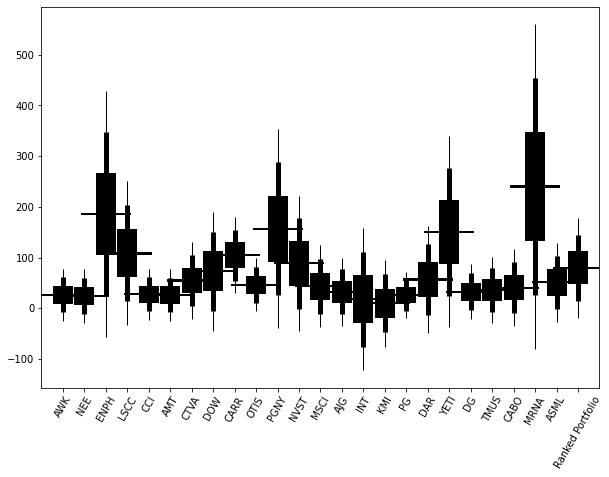

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

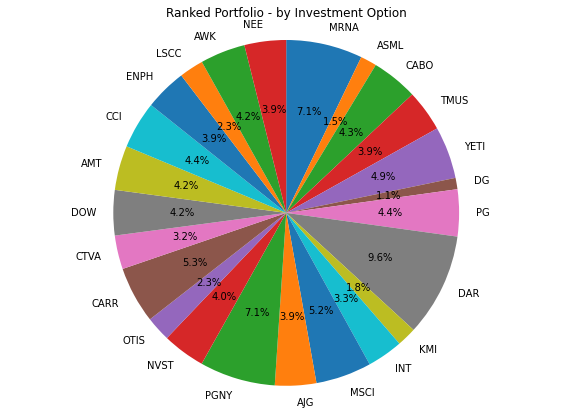

MRNA   0.07
ASML   0.02
CABO   0.04
TMUS   0.04
YETI   0.05
DG     0.01
PG     0.04
DAR    0.10
KMI    0.02
INT    0.03
MSCI   0.05
AJG    0.04
PGNY   0.07
NVST   0.04
OTIS   0.02
CARR   0.05
CTVA   0.03
DOW    0.04
AMT    0.04
CCI    0.04
ENPH   0.04
LSCC   0.02
AWK    0.04
NEE    0.04



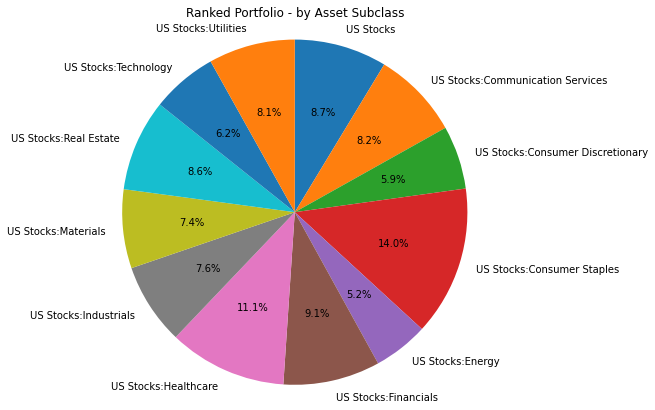

US Stocks                          0.09
US Stocks:Communication Services   0.08
US Stocks:Consumer Discretionary   0.06
US Stocks:Consumer Staples         0.14
US Stocks:Energy                   0.05
US Stocks:Financials               0.09
US Stocks:Healthcare               0.11
US Stocks:Industrials              0.08
US Stocks:Materials                0.07
US Stocks:Real Estate              0.09
US Stocks:Technology               0.06
US Stocks:Utilities                0.08



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    AWK                            0.0421
    NEE                            0.0389
    ENPH                           0.0390
    LSCC                           0.0227
    CCI                            0.0443
    AMT                            0.0416
    CTVA                           0.0316
    DOW                            0.0423
    CARR                           0.0530
    OTIS                           0.0233
    PGNY                           0.0707
    NVST                           0.0399
    MSCI                           0.0521
    AJG                            0.0386
    INT                            0.0334
    KMI                            0.0182
    PG                             0.0439
    DAR                            0.0963
    YETI                           0.0488
    DG                             0.0106
    TMUS                           0.0388
    CABO                           0.0433
    MRNA                           0.0715
    ASML

### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...........

Ranked Portfolio Metrics:          
    max_sharpe_ratio           2.82
    annual_return             78.02
    std_dev                   27.66
    worst typical down year   22.70
    black_swan                -4.96


Ranked Portfolio Weights:
    AWK                            0.0000
    NEE                            0.0700
    ENPH                           0.0700
    LSCC                           0.0500
    CCI                            0.0000
    AMT                            0.0400
    CTVA                           0.0000
    DOW                            0.0000
    CARR                           0.1300
    OTIS                           0.1100
    PGNY                           0.1000
    NVST                           0.0400
    MSCI                           0.0700
    AJG                            0.0000
    INT                            0.0000
    KMI                            0.0000
    PG                             0.1200
    DAR     

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).